# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import math
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [ ]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [ ]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [ ]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

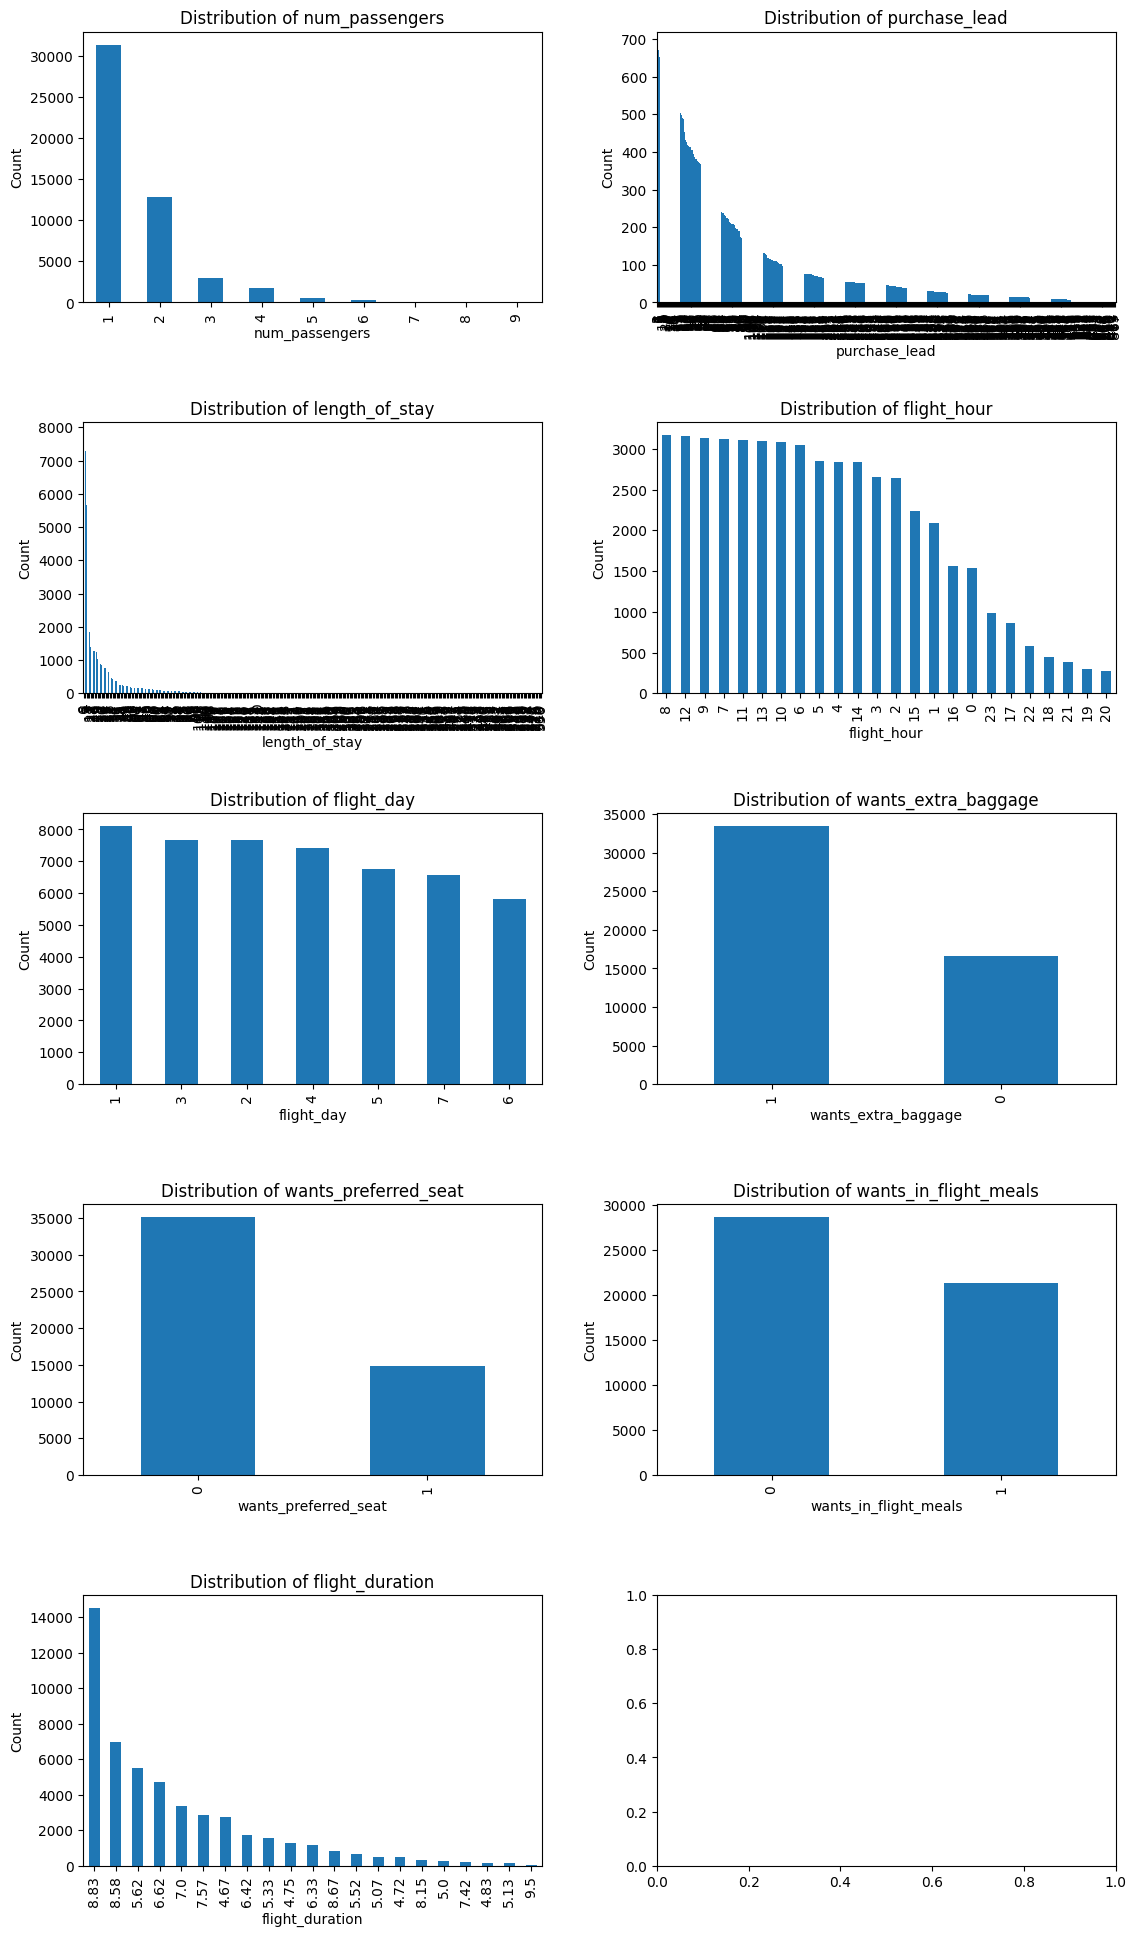

In [ ]:
# Seperate label with dataset
label = df['booking_complete']
df_bronze = df.drop('booking_complete', axis=1)

# Seperate numerical and categorical columns
num_col = df_bronze.select_dtypes(include = ['int64', 'float64']).columns
cat_col = df_bronze.select_dtypes(include = ['object']).columns

# Plot the distribution of all numeric numbers for normalization indentificaiton
num_cols = len(num_col)
cols = 2
rows = math.ceil(num_cols / cols)

fig, axes = plt.subplots(rows, cols, figsize=(12, rows * 4)) # Configure subplots
axes = axes.flatten()

for i, col in enumerate(num_col):
  df_bronze[col].value_counts().plot(kind='bar', ax=axes[i], title=f'Distribution of {col}')
  axes[i].set_ylabel('Count')
  axes[i].set_xlabel(col)
plt.tight_layout(pad=3.0)
plt.show()

In [ ]:
# Apply standarlization on high vairty numerical columns
norm = StandardScaler()
high_num = ['purchase_lead','length_of_stay']
df_bronze[high_num] = norm.fit_transform(df_bronze[high_num])

df_silver = df_bronze

df_silver.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
0,2,Internet,RoundTrip,1.957530,-0.119353,7,6,AKLDEL,New Zealand,1,0,0,5.52
1,1,Internet,RoundTrip,0.299164,-0.089844,3,6,AKLDEL,New Zealand,0,0,0,5.52
2,2,Internet,RoundTrip,1.747470,-0.030824,17,3,AKLDEL,India,1,1,0,5.52
3,1,Internet,RoundTrip,0.122272,0.234761,4,6,AKLDEL,New Zealand,0,0,1,5.52
4,2,Internet,RoundTrip,-0.187290,-0.030824,15,3,AKLDEL,India,1,0,1,5.52


In [ ]:
df_silver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  float64
 4   length_of_stay         50000 non-null  float64
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  int64  
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
dtypes: float64(3), int64(6), object(4)
memory usage: 5.0+ MB


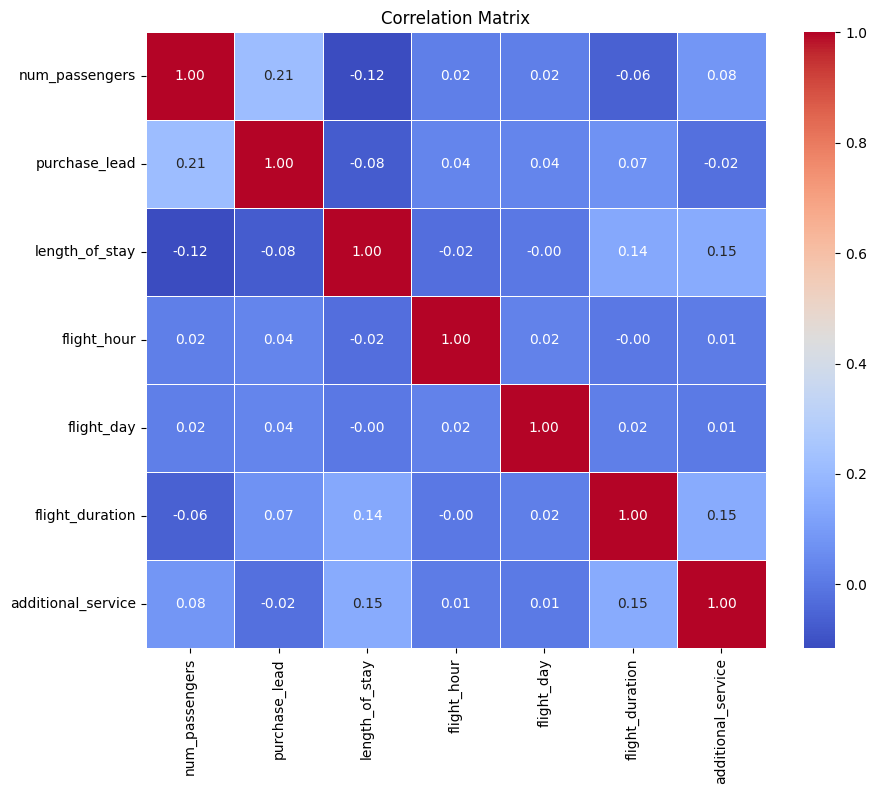

In [ ]:
# Define functions to create new categorical features

def flight_hour_cat(row):
    if row['flight_hour'] in range(6, 13):
        return 'morning'
    elif row['flight_hour'] in range(13, 19):
        return 'afternoon'
    elif row['flight_hour'] in range(19, 24):
        return 'evening'
    else:
        return 'night'

def purchase_lead_cat(row):
    if row['purchase_lead'] > 5:
        return 'last minute'
    else:
        return 'early book'

def num_cust_cat(row):
    if row['num_passengers'] >= 3:
        return 'family'
    elif row['num_passengers'] == 2:
        return 'couple'
    else:
        return 'solo'

# Apply feature engineering functions
df_silver['flight_hour_cat'] = df_silver.apply(flight_hour_cat, axis=1)
df_silver['purchase_lead_cat'] = df_silver.apply(purchase_lead_cat, axis=1)
df_silver['num_passengers_cat'] = df_silver.apply(num_cust_cat, axis=1)

# Create interaction feature 'additional_service'
df_silver['additional_service'] = df_silver['wants_extra_baggage'] + df_silver['wants_preferred_seat'] + df_silver['wants_in_flight_meals']
df_silver = df_silver.drop(['wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals'], axis=1)
# Check correlations of numerical features
num_cols_silver = df_silver.select_dtypes(include = ['int64', 'float64'])
correlation_matrix = num_cols_silver.corr()

# Display correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# Initialize label encoder and define categorical columns
df_gold = df_silver.copy()
lab = LabelEncoder()
categorical_cols = df_silver.select_dtypes(include=['object', 'category']).columns

# Apply label encoder
for col in categorical_cols:
    df_gold[col] = lab.fit_transform(df_silver[col])
df_gold.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,flight_duration,flight_hour_cat,purchase_lead_cat,num_passengers_cat,additional_service
0,2,0,2,1.957530,-0.119353,7,6,0,61,5.52,2,0,0,1
1,1,0,2,0.299164,-0.089844,3,6,0,61,5.52,3,0,2,0
2,2,0,2,1.747470,-0.030824,17,3,0,36,5.52,0,0,0,2
3,1,0,2,0.122272,0.234761,4,6,0,61,5.52,3,0,2,1
4,2,0,2,-0.187290,-0.030824,15,3,0,36,5.52,0,0,0,2


In [ ]:
# Split the dataset into train and test set
X_train , X_test , y_train , y_test = train_test_split(df_gold,label,test_size=0.3,random_state=42)
print(X_train.shape,X_test.shape)

(35000, 14) (15000, 14)


In [ ]:
df_feature

,Feature,Importance
3,purchase_lead,0.187469
7,route,0.151234
4,length_of_stay,0.124841
5,flight_hour,0.118516
8,booking_origin,0.108818
6,flight_day,0.089092
9,flight_duration,0.073818
13,additional_service,0.051920
10,flight_hour_cat,0.031394
0,num_passengers,0.029954


In [ ]:
# Initilize random forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')
print(f'Cross validation Accuracy: {cv_scores.mean()}')

Cross validation Accuracy: 0.8503999999999999


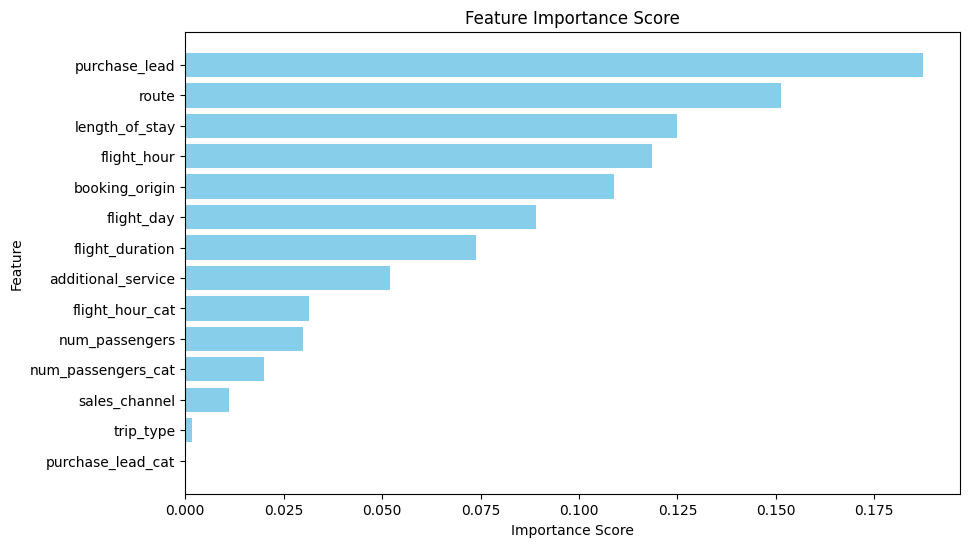

In [ ]:
feature_importance = rf_model.feature_importances_
df_feature = pd.DataFrame({'Feature': df_gold.columns, 'Importance': feature_importance})
df_feature = df_feature.sort_values('Importance',ascending = True)
plt.figure(figsize=(10, 6))
plt.barh(df_feature['Feature'], df_feature['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importance Score')
plt.show()